# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Larasati Romadhani Yunita Putri
- **Email:** m296b4kx2254@bangkit.academy 
- **ID Dicoding:** GRX5OVNWYP0M

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana fluktuasi penjualan yang terjadi pada e-commerce?
- Kota mana saja yang memiliki pembeli terbanyak?
- Produk apa yang paling disukai dan yang paling tidak disukai oleh pembeli?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [4]:
customer_df = pd.read_csv("C:/Users/laras/proyek_analisis_data/E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv")
order_item_df = pd.read_csv("C:/Users/laras/proyek_analisis_data/E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv")
review_df = pd.read_csv("C:/Users/laras/proyek_analisis_data/E-commerce-public-dataset/E-Commerce Public Dataset/order_reviews_dataset.csv")
purchase_time_df = pd.read_csv("C:/Users/laras/proyek_analisis_data/E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv")

**Insight:**
- tabel customer_df akan digunakan untuk menjawab pertantaan ketiga, karena dalam tabel tersebut memuat asal kota dan negara dari setiap customer/pembelinya
- tabel order_item_df akan digunakan untuk menjawab pertanyaan pertama, karena di dalam tabel tersebut memuat item apa saja yang berhasil terjual beserta dengan quantity nya. 
- tabel review_df akan digunakan untuk menjawab pertanyaan keempat, karena didalam tabel tersebut memuat score/rating dari setiap produk yang dijual di e-commerce ini
- tabel purchase_time_df akan digunakan untuk menjawab pertanyaan kedua, karena didalam tabel tersebut memuat tanggal dan waktu dari orderan yang berhasil

### Assessing Data

#### 1.  Menilai Data customer_df

##### 1.1. Mencari missing value dan mencocokkan tipe data

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Insight:
- Pada customer_df tidak terdapat missing value, hal ini dibuktikan pada kolom Non-Null yang menunjukkan jumlah datanya sama dari setiap kolom yang ada. 
- Pada tabel ini juga tidak terdapat tipe data yang salah, id yang tercantum memiliki karakter huruf sehingga id tersebut terbaca sebagai tipe data object.

##### 1.2. Menghitung duplikasi

In [6]:
def count_duplicate(df):
    duplicate = df.duplicated().sum()
    if duplicate == 0:
        print('tidak terdapat duplikasi')
    else:
        print('terdapat duplikasi sebanyak:', duplicate)

count_duplicate(customer_df)

tidak terdapat duplikasi


##### 1.3. Mencari informasi mengenai tabel melalui function describe()

In [7]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Kolom yang dapat dihitung hanya kolom yang bertipe integer
- Tidak ada keanehan yang terjadi dalam tabel customer_df

#### 2.  Menilai Data order_item_df

##### 2.1. Mencari missing value dan mencocokkan tipe data

In [8]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Insight:
- Pada customer_df tidak terdapat missing value, hal ini dibuktikan pada kolom Non-Null yang menunjukkan jumlah datanya sama dari setiap kolom yang ada. 
- Pada tabel ini juga tidak terdapat tipe data yang salah

##### 2.2. Menghitung duplikasi

In [9]:
count_duplicate(order_item_df)

tidak terdapat duplikasi


##### 1.3. Mencari informasi mengenai tabel melalui function describe()

In [10]:
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Kolom yang dapat dihitung hanya kolom yang bertipe integer
- Tidak ada keanehan yang terjadi dalam tabel order_item_df

#### 3.  Menilai Data review_df

##### 3.1. Mencari missing value dan mencocokkan tipe data

In [11]:
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Insight:
- Pada customer_df terdapat missing value, hal ini dibuktikan pada kolom Non-Null yang menunjukkan jumlah datanya tidak sama dari setiap kolom yang ada. 
- Pada tabel ini juga tidak terdapat tipe data yang salah

In [13]:
review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Insight:
- Terdapat missing value pada kolom review_comment_title sebanyak 87656 dan kolom review_comment_massage sebanyak 58247
- Karena kita nantinya tidak akan menggunakan kolom tersebut, dengan kata lain, kolom tersebut tidak mempengaruhi proses analisis, maka saya akan menghapus kedua kolom ini

##### 3.2. Menghitung duplikasi

In [14]:
count_duplicate(review_df)

tidak terdapat duplikasi


##### 3.3. Mencari informasi mengenai tabel melalui function describe()

In [15]:
review_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Kolom yang dapat dihitung hanya kolom yang bertipe integer
- Tidak ada keanehan yang terjadi dalam tabel review_df

#### 4.  Menilai Data purchase_time_df

##### 4.1. Mencari missing value dan mencocokkan tipe data

In [16]:
purchase_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Insight:
- Pada purchase_time_df  terdapat missing value, hal ini dibuktikan pada kolom Non-Null yang menunjukkan jumlah datanya tidak sama dari setiap kolom yang ada. 
- Pada tabel ini juga tidak terdapat tipe data yang salah

In [17]:
purchase_time_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Insight:
- Terdapat missing value pada kolom order_approved_at sebanyak 160, kolom order_delivered_carrier_date  sebanyak 1783, dan kolom order_delivered_customer_date sebanyak 2965
- Karena kita nantinya tidak akan menggunakan kolom tersebut, dengan kata lain, kolom tersebut tidak mempengaruhi proses analisis, maka saya akan menghapus ketiga kolom ini

Kesimpulan : sudah tidak ada lagi missing value pada tabel purchase_time_df

##### 2.2. Menghitung duplikasi

In [18]:
count_duplicate(purchase_time_df)

tidak terdapat duplikasi


##### 1.3. Mencari informasi mengenai tabel melalui function describe()

In [19]:
purchase_time_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Tidak ada keanehan yang terjadi dalam tabel order_item_df

### Cleaning Data

##### 1. Membersihkan data customer_df
Tidak ada yang perlu dibersihkan pada data customer_df

##### 2. Membersihkan data order_item_df
Tidak ada yang perlu dibersihkan pada data order_item_df

##### 3. Membersihkan data review_df

In [33]:
delete_column = ['review_comment_title','review_comment_message']
review_df.drop(delete_column, axis=1, inplace=True)

In [35]:
review_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

**Insight:**
Missing value telah di atasi

##### 4. Membersihkan data purchase_time

In [41]:
delete_column = ['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']
purchase_time_df.drop(delete_column, axis=1, inplace=True)

In [42]:
purchase_time_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64

Kesimpulan: sudah tidak ada lagi kolom yang memiliki missing value

## Exploratory Data Analysis (EDA)

### 1. Explore data order_item_df untuk menjawab pertanyaan pertama

In [112]:
order_item_df.describe()

,order_item_id,price,freight_value,quantity
count,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320,1.289658
std,0.705124,183.633928,15.806405,0.960615
min,1.000000,0.850000,0.000000,1.000000
25%,1.000000,39.900000,13.080000,1.000000
50%,1.000000,74.990000,16.260000,1.000000
75%,1.000000,134.900000,21.150000,1.000000
max,21.000000,6735.000000,409.680000,20.000000


In [113]:
# Membuat kolom baru bernama quantity untuk menyimpan banyaknya produk yang terjual berdasar banyaknya baris pada product id yang sama
order_item_df['quantity']= order_item_df.groupby(['order_id','product_id'])['product_id'].transform('count')

# menghapus duplicate dan hanya menyimpan satu baris per product_id per order_id
df_unique_order = order_item_df.drop_duplicates(subset=['order_id', 'product_id'])

# Melihat hasilnya
df_unique_order

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,quantity
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1


In [128]:
# Menghitung total quantity per produk
product_sales = df_unique_order.groupby('product_id')['quantity'].sum().reset_index()

# Mengambil 5 produk yang paling banyak terjual
top_5_most_sold = product_sales.nlargest(5, 'quantity')
# Mengambil 5 produk yang paling sedikit terjual
top_5_least_sold = product_sales.nsmallest(5, 'quantity')

# Menampilkan hasil
print("5 Produk yang paling banyak terjual:")
print(top_5_most_sold)

print("\n5 Produk yang paling sedikit terjual:")
print(top_5_least_sold)

5 Produk yang paling banyak terjual:
                             product_id  quantity
22112  aca2eb7d00ea1a7b8ebd4e68314663af       527
19742  99a4788cb24856965c36a24e339b6058       488
8613   422879e10f46682990de24d770e7f83d       484
7364   389d119b48cf3043d311335e499d9c6b       392
7079   368c6c730842d78016ad823897a372db       388

5 Produk yang paling sedikit terjual:
                         product_id  quantity
0  00066f42aeeb9f3007548bb9d3f33c38         1
1  00088930e925c41fd95ebfe695fd2655         1
2  0009406fd7479715e4bef61dd91f2462         1
4  000d9be29b5207b54e86aa1b1ac54872         1
5  0011c512eb256aa0dbbb544d8dffcf6e         1


1. Produk yang Paling Banyak Terjual:
- Produk dengan ID aca2eb7d00ea1a7b8ebd4e68314663af adalah yang paling laris, terjual sebanyak 527 unit. Ini menunjukkan bahwa produk ini sangat populer atau mungkin memiliki permintaan yang tinggi di pasar.
- Produk dengan ID 99a4788cb24856965c36a24e339b6058 berada di urutan kedua, dengan penjualan 488 unit.
- Produk dengan ID 422879e10f46682990de24d770e7f83d berada di urutan ketiga, terjual 484 unit.
- Produk di daftar ini umumnya terjual lebih dari 350 unit, menunjukkan bahwa produk-produk ini memiliki daya tarik yang signifikan terhadap konsumen.

Insight: Produk-produk ini mungkin terletak dalam kategori yang sangat diminati, sehingga meningkatkan volume penjualannya. Penjual atau perusahaan bisa fokus pada penawaran promosi untuk produk-produk ini, atau melakukan analisis lebih lanjut untuk memahami alasan kesuksesan penjualannya, seperti harga, fitur, atau kategori produk.
2. Produk yang Paling Sedikit Terjual:
- Produk dengan ID 00066f42aeeb9f3007548bb9d3f33c38, 00088930e925c41fd95ebfe695fd2655, 0009406fd7479715e4bef61dd91f2462, 000d9be29b5207b54e86aa1b1ac54872, dan 0011c512eb256aa0dbbb544d8dffcf6e semuanya hanya terjual 1 unit.

Insight: Produk-produk ini memiliki penjualan yang sangat rendah, yang mungkin disebabkan oleh beberapa faktor seperti kurangnya promosi, harga yang tidak kompetitif, kurangnya permintaan, atau kualitas produk yang kurang menarik bagi konsumen. Penjual mungkin perlu melakukan evaluasi terkait penjualan produk ini. Apakah produk tersebut memiliki ulasan buruk? Apakah produk tersebut tidak mendapatkan eksposur yang cukup? Perlu strategi pemasaran yang lebih baik atau mungkin penghentian penjualan produk yang kinerjanya buruk.

### 2. Explore Data purchase_time_df untuk menjawab pertanyaan kedua

In [106]:
# Mengonversi kolom order_purchase_timestamp menjadi datetime
purchase_time_df['order_purchase_timestamp'] = pd.to_datetime(purchase_time_df['order_purchase_timestamp'])

# Membuat kolom baru untuk bulan dan tahun berdasarkan timestamp
purchase_time_df['purchase_month'] = purchase_time_df['order_purchase_timestamp'].dt.to_period('M')

# Menghitung jumlah order per bulan
monthly_sales = purchase_time_df.groupby('purchase_month').size()

# Menampilkan hasil fluktuasi penjualan
print("Fluktuasi Penjualan per Bulan:")
monthly_sales


Fluktuasi Penjualan per Bulan:


purchase_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, dtype: int64

Insight: 
Data menunjukkan bahwa penjualan e-commerce mengalami pertumbuhan yang sangat baik hingga November 2017, dengan penurunan signifikan setelah itu. Memahami penyebab di balik penurunan ini dan menganalisis faktor musiman dapat membantu dalam merumuskan strategi untuk meningkatkan penjualan di masa mendatang.

### 3. Explore Data customer_df untuk menjawab pertanyaan ketiga

In [108]:
# Mengelompokkan data dan menghitung jumlah pembeli unik
top_customers = customer_df.groupby(['customer_city', 'customer_state']).customer_unique_id.nunique().reset_index()

# Memberi nama kolom untuk kejelasan
top_customers.columns = ['customer_city', 'customer_state', 'num_customers']

# Mengurutkan hasil berdasarkan jumlah pembeli terbanyak
top_customers_sorted = top_customers.sort_values(by='num_customers', ascending=False)

# Menampilkan 5 kota dengan pembeli terbanyak
top_5_cities = top_customers_sorted.head(5)
print(top_5_cities)

       customer_city customer_state  num_customers
3758       sao paulo             SP          14984
3281  rio de janeiro             RJ           6620
469   belo horizonte             MG           2672
587         brasilia             DF           2069
1187        curitiba             PR           1465


**Insight**

- Kota-kota yang muncul di daftar teratas menunjukkan lokasi-lokasi strategis di mana permintaan barang atau jasa sangat tinggi. Ini bisa menjadi indikator pasar yang menguntungkan untuk pengembangan produk atau layanan lebih lanjut.
- Misalnya, jika kota seperti São Paulo muncul sebagai kota dengan pembeli terbanyak, ini menunjukkan potensi besar untuk memperluas operasi atau promosi di daerah tersebut.

### 4. Explore data review_df untuk menjawab pertanyaan keempat

In [111]:
# Menghitung rata-rata skor ulasan untuk setiap produk
average_review_scores = review_df.groupby('order_id')['review_score'].mean().reset_index()

# Mengurutkan berdasarkan skor tertinggi dan terendah
most_liked_product = average_review_scores.loc[average_review_scores['review_score'].idxmax()]
least_liked_product = average_review_scores.loc[average_review_scores['review_score'].idxmin()]

# Menampilkan hasil
print("Produk yang paling disukai:")
print(most_liked_product)

print("\nProduk yang paling tidak disukai:")
print(least_liked_product)


Produk yang paling disukai:
order_id        00010242fe8c5a6d1ba2dd792cb16214
review_score                                 5.0
Name: 0, dtype: object

Produk yang paling tidak disukai:
order_id        0005a1a1728c9d785b8e2b08b904576c
review_score                                 1.0
Name: 8, dtype: object


## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak dan paling sedikit terjual?

C:\Users\laras\AppData\Local\Temp\ipykernel_29728\1517175146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantity', y='product_id', data=top_5_most_sold, ax=axes[0], palette='Greens_d')
C:\Users\laras\AppData\Local\Temp\ipykernel_29728\1517175146.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantity', y='product_id', data=top_5_least_sold, ax=axes[1], palette='Reds_d')


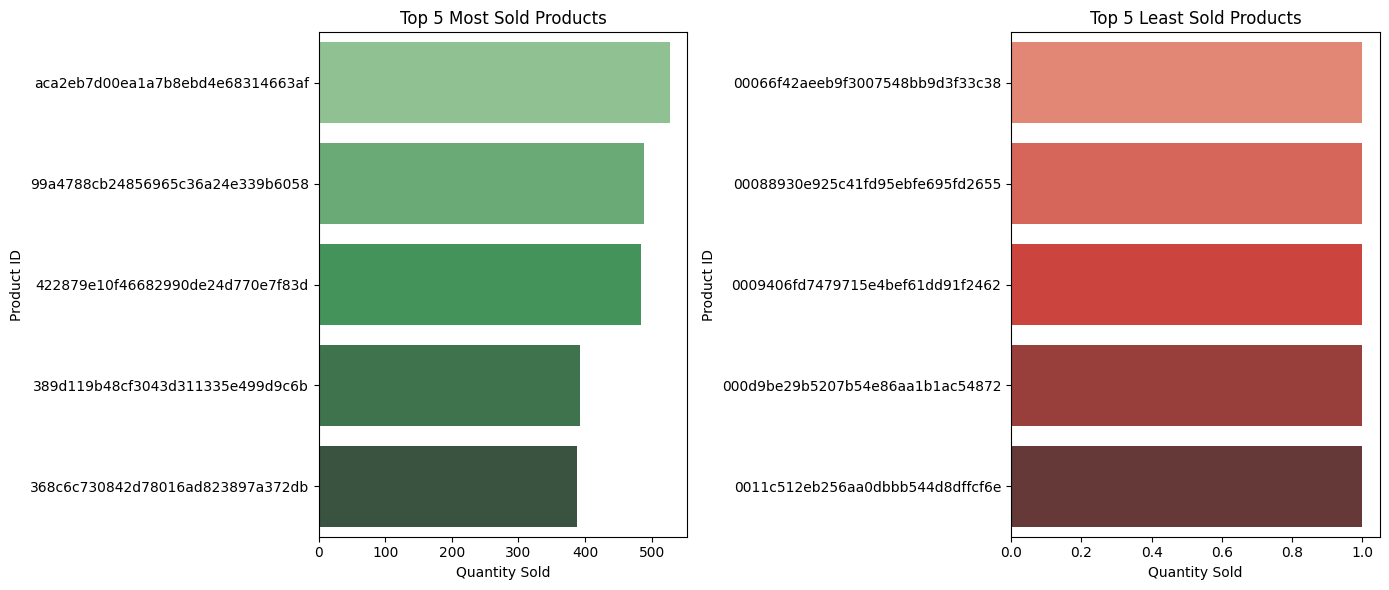

In [129]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for top 5 most sold products
sns.barplot(x='quantity', y='product_id', data=top_5_most_sold, ax=axes[0], palette='Greens_d')
axes[0].set_title('Top 5 Most Sold Products')
axes[0].set_xlabel('Quantity Sold')
axes[0].set_ylabel('Product ID')

# Plot for top 5 least sold products
sns.barplot(x='quantity', y='product_id', data=top_5_least_sold, ax=axes[1], palette='Reds_d')
axes[1].set_title('Top 5 Least Sold Products')
axes[1].set_xlabel('Quantity Sold')
axes[1].set_ylabel('Product ID')

plt.tight_layout()
plt.show()

**insight**
1. Top 5 Produk Terlaris :
- Produk dengan ID aca2eb7d00ea1a7b8ebd4e68314663af merupakan yang paling banyak terjual, diikuti oleh produk dengan ID 99a4788cb24856965c36a24e339b6058.
- Semua produk dalam daftar ini memiliki kuantitas penjualan yang cukup tinggi, berkisar antara sekitar 350 hingga lebih dari 500 unit.
- Produk-produk ini kemungkinan besar menjadi pilihan utama bagi konsumen, baik karena popularitas, kualitas, atau kebutuhan pasar yang tinggi.

2. Top 5 Produk yang Paling Sedikit Terjual:
- Produk dengan ID 00066f42aeeb9f3007548bb9d3f33c38 adalah produk yang terjual paling sedikit, diikuti oleh produk dengan ID 0088930e925c41fd95ebfe695fd2655.
- Semua produk dalam daftar ini memiliki kuantitas penjualan yang sangat rendah, dengan nilai yang sangat mendekati 0 (mungkin hanya beberapa unit saja).
- Produk-produk ini mungkin kurang menarik bagi konsumen, atau permintaannya sangat rendah. Alasan lain bisa jadi terkait dengan harga, kurangnya promosi, atau tidak relevannya produk dengan kebutuhan pasar saat ini.

Perbedaan yang signifikan antara produk terlaris dan produk yang paling sedikit terjual menunjukkan bahwa terdapat produk-produk unggulan yang sangat diminati pasar, sementara beberapa produk lain hampir tidak memiliki penjualan sama sekali.

### Pertanyaan 2: Bagaimana fluktuasi penjualan yang terjadi pada e-commerce?

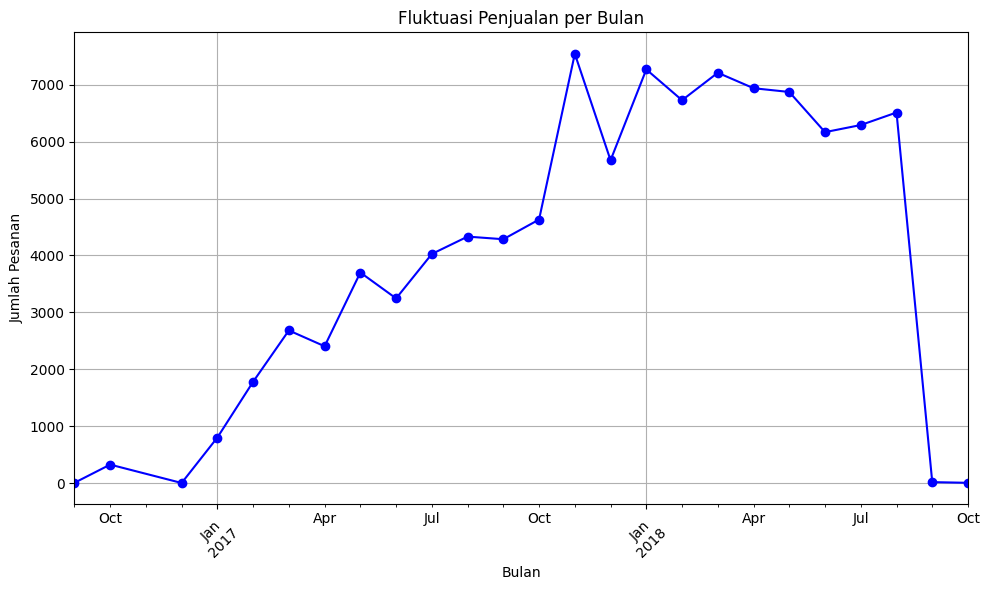

In [131]:
# Mengonversi kolom order_purchase_timestamp menjadi datetime
purchase_time_df['order_purchase_timestamp'] = pd.to_datetime(purchase_time_df['order_purchase_timestamp'])

# Membuat kolom baru untuk bulan dan tahun berdasarkan timestamp
purchase_time_df['purchase_month'] = purchase_time_df['order_purchase_timestamp'].dt.to_period('M')

# Menghitung jumlah order per bulan
monthly_sales = purchase_time_df.groupby('purchase_month').size()

# Membuat visualisasi fluktuasi penjualan per bulan sebagai line chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Fluktuasi Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


**insight**
Kenaikan Signifikan pada Awal 2017: Penjualan meningkat secara bertahap dari Oktober 2016 hingga mencapai puncak pada sekitar akhir 2017. Ini menunjukkan adanya pertumbuhan yang stabil dalam jumlah pesanan.

Puncak Penjualan pada Akhir 2017: Penjualan mencapai titik tertinggi di bulan Oktober 2017, dengan jumlah pesanan mencapai lebih dari 7.000 pesanan.

Penurunan Setelah Puncak: Setelah mencapai puncaknya, terjadi fluktuasi yang tajam dan penurunan signifikan di beberapa bulan berikutnya. Namun, secara umum, meskipun ada penurunan, jumlah pesanan tetap berada di sekitar 4.000-5.000 pesanan, yang masih cukup tinggi.

Penurunan Drastis pada Akhir Periode: Ada penurunan yang sangat tajam di sekitar bulan September-Oktober 2018, di mana jumlah pesanan turun hingga mendekati nol. Ini bisa menunjukkan adanya masalah besar, seperti perubahan strategi bisnis, gangguan operasional, atau faktor eksternal yang mempengaruhi bisnis secara drastis.

Stabilitas di Tengah Periode: Setelah penurunan pertama pasca puncak, penjualan cenderung stabil dengan fluktuasi kecil di sepanjang tahun 2018 hingga penurunan besar di akhir periode.

**Insight:**
- xxx
- xxx

### pertanyaan 3 : Kota mana saja yang memiliki pembeli terbanyak?

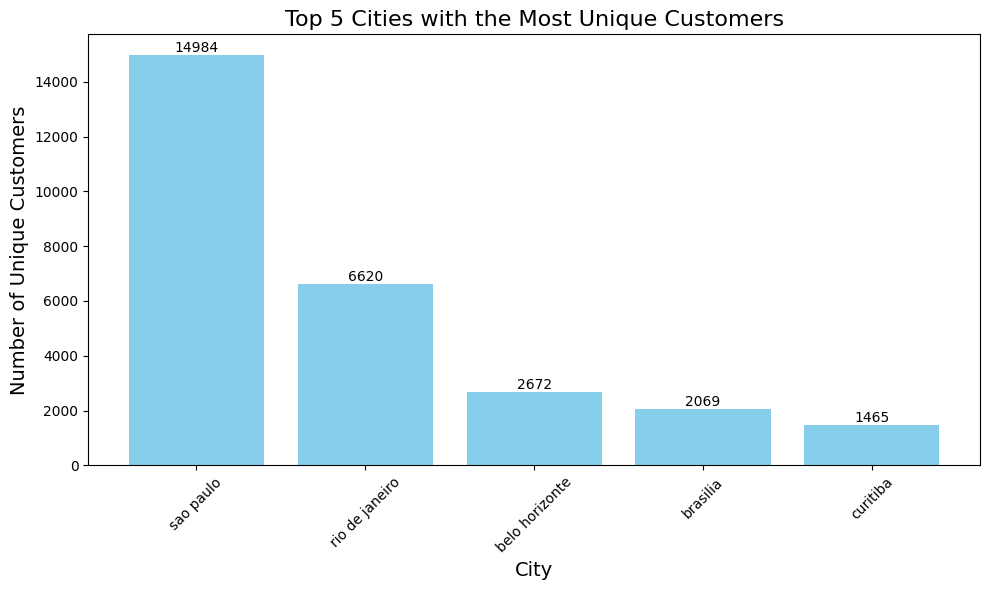

In [132]:
# Membuat visualisasi batang
plt.figure(figsize=(10, 6))
plt.bar(top_5_cities['customer_city'], top_5_cities['num_customers'], color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Top 5 Cities with the Most Unique Customers', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Unique Customers', fontsize=14)
plt.xticks(rotation=45)  # Memutar label kota agar lebih mudah dibaca

# Menampilkan nilai di atas setiap batang
for index, value in enumerate(top_5_cities['num_customers']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()

**insight**
Dominasi São Paulo: São Paulo memiliki jumlah pelanggan unik paling banyak, yaitu 14.984. Angka ini jauh lebih tinggi dibandingkan kota lain, hampir lebih dari dua kali lipat dibandingkan Rio de Janeiro, yang menempati posisi kedua. Ini menunjukkan bahwa São Paulo merupakan pasar yang sangat penting bagi bisnis.

Rio de Janeiro di Posisi Kedua: Meskipun lebih rendah dari São Paulo, Rio de Janeiro memiliki jumlah pelanggan unik yang cukup signifikan, yaitu 6.620 pelanggan. Kota ini masih merupakan pasar penting namun dengan skala yang lebih kecil dibandingkan São Paulo.

Penurunan Signifikan Setelah Rio de Janeiro: Setelah dua kota terbesar, ada penurunan signifikan dalam jumlah pelanggan unik. Belo Horizonte (2.672 pelanggan), Brasília (2.069 pelanggan), dan Curitiba (1.465 pelanggan) menunjukkan bahwa pasar di luar dua kota besar ini jauh lebih kecil.

Konsentrasi Pelanggan: Dua kota terbesar, São Paulo dan Rio de Janeiro, menyumbang sebagian besar pelanggan unik. Sementara tiga kota lainnya (Belo Horizonte, Brasília, Curitiba) masih memiliki jumlah pelanggan yang signifikan, namun tidak sebesar dua kota utama tersebut.

### Pertanyaan 4 : Produk apa yang paling disukai dan yang paling tidak disukai oleh pembeli?

C:\Users\laras\AppData\Local\Temp\ipykernel_29728\334822737.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=products, y=scores, palette="Blues_d")


Text(0.5, 0, 'ID Produk')

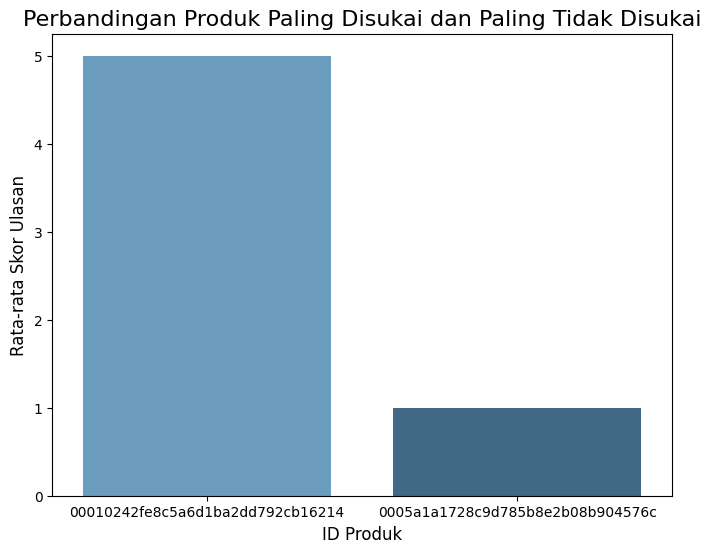

In [135]:
most_liked_product_name = '00010242fe8c5a6d1ba2dd792cb16214'  # order_id produk yang paling disukai
least_liked_product_name = '0005a1a1728c9d785b8e2b08b904576c'  # order_id produk yang paling tidak disukai

# Skor ulasan produk
most_liked_score = 5.0  # Skor ulasan tertinggi
least_liked_score = 1.0  # Skor ulasan terendah

# Data untuk visualisasi
products = [most_liked_product_name, least_liked_product_name]
scores = [most_liked_score, least_liked_score]

# Membuat plot
plt.figure(figsize=(8, 6))
sns.barplot(x=products, y=scores, palette="Blues_d")

# Menambahkan judul dan label
plt.title('Perbandingan Produk Paling Disukai dan Paling Tidak Disukai', fontsize=16)
plt.ylabel('Rata-rata Skor Ulasan', fontsize=12)
plt.xlabel('ID Produk', fontsize=12)

**insight**
Perbedaan Skor Ulasan yang Signifikan:

Produk dengan ID 00010242fe8c5a6d1ba2dd792cb16214 memiliki rata-rata skor ulasan tertinggi, yaitu 5.0, yang menunjukkan bahwa produk ini sangat disukai oleh pembeli.
Produk dengan ID 0005a1a1728c9d785b8e2b08b904576c memiliki rata-rata skor ulasan terendah, yaitu 1.0, yang menunjukkan bahwa produk ini tidak disukai oleh pembeli.

Kepuasan Pelanggan yang Kontras:

Perbedaan antara skor tertinggi (5.0) dan terendah (1.0) menunjukkan adanya perbedaan yang sangat besar dalam kepuasan pelanggan antara kedua produk ini. Produk pertama memiliki ulasan yang sangat positif, sedangkan produk kedua menerima ulasan yang sangat negatif.
Potensi Tindak Lanjut:

Produk yang disukai: Produk dengan skor 5.0 dapat menjadi acuan untuk memahami faktor-faktor yang membuat pelanggan puas. Analisis lebih mendalam tentang fitur atau kualitas produk ini dapat membantu dalam strategi pemasaran dan pengembangan produk lainnya.
Produk yang tidak disukai: Produk dengan skor 1.0 memerlukan perhatian lebih. Perusahaan harus mempertimbangkan untuk mengevaluasi alasan di balik ulasan negatif, seperti masalah kualitas, ketidaksesuaian dengan deskripsi, atau layanan purna jual yang buruk. Tindakan perbaikan perlu diambil untuk mengatasi masalah ini.
Strategi Produk:

Produk yang paling disukai bisa menjadi fokus dalam promosi atau bisa digunakan sebagai studi kasus dalam meningkatkan produk lain.
Produk yang paling tidak disukai perlu diperbaiki atau bahkan ditarik dari pasar jika masalahnya sangat serius, setelah memahami penyebab dari ulasan negatif.

## Analisis Lanjutan Clustering 

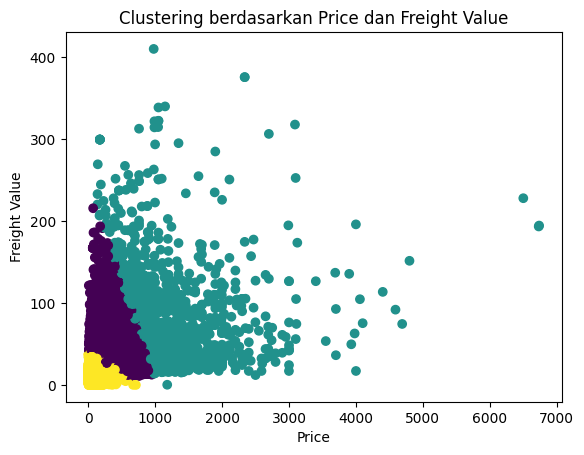

In [145]:

# Ambil kolom yang relevan untuk clustering ('price' dan 'freight_value')
X = order_item_df[['price', 'freight_value']]

# 4. Data normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering menggunakan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
order_item_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.scatter(order_item_df['price'], order_item_df['freight_value'], c=order_item_df['Cluster'], cmap='viridis')
plt.title('Clustering berdasarkan Price dan Freight Value')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.show()

Insight:
- Cluster kuning dan ungu: Kelompok pesanan dengan harga produk yang relatif rendah dan biaya pengiriman yang tidak terlalu tinggi, menunjukkan bahwa sebagian besar pesanan memiliki harga yang terjangkau dengan biaya pengiriman rendah.
- Cluster hijau: Menunjukkan bahwa produk dengan harga lebih tinggi memiliki distribusi biaya pengiriman yang lebih luas, termasuk beberapa produk yang harganya tinggi dengan biaya pengiriman yang cukup besar. Ini bisa mewakili produk premium atau pesanan internasional yang memerlukan biaya pengiriman lebih tinggi.
- Sebagian besar pesanan berada dalam rentang harga yang lebih rendah (di bawah 1000), dan ada cluster kecil yang memiliki harga lebih tinggi.
- Freight value cenderung bervariasi lebih lebar pada produk dengan harga yang lebih tinggi, menunjukkan bahwa barang mahal mungkin dikirim dari jarak lebih jauh atau dengan layanan pengiriman yang lebih mahal.


## Conclusion

- Produk dengan penjualan tertinggi, seperti ID aca2eb7d00ea1a7b8ebd4e68314663af yang terjual 527 unit, menunjukkan permintaan yang kuat dan potensi untuk promosi lebih lanjut, sementara produk dengan penjualan terendah, seperti ID 00066f42aeeb9f3007548bb9d3f33c38, 00088930e925c41fd95ebfe695fd2655, 0009406fd7479715e4bef61dd91f2462, 000d9be29b5207b54e86aa1b1ac54872, dan 0011c512eb256aa0dbbb544d8dffcf6e yang hanya terjual 1 unit, perlu dievaluasi dan mungkin memerlukan strategi pemasaran yang lebih baik atau penghentian penjualan.
- Data menunjukkan pertumbuhan penjualan e-commerce yang baik hingga November 2017, diikuti oleh penurunan signifikan; memahami penyebab penurunan dan faktor musiman dapat membantu merumuskan strategi untuk meningkatkan penjualan di masa depan.
- Kota-kota teratas menunjukkan lokasi strategis dengan permintaan tinggi, seperti São Paulo, yang mengindikasikan potensi besar untuk memperluas operasi atau promosi di daerah tersebut.
- Produk dengan ID 00010242fe8c5a6d1ba2dd792cb16214 memiliki rata-rata skor ulasan tertinggi, yaitu 5.0, yang menunjukkan bahwa produk ini sangat disukai oleh pembeli.
Produk dengan ID 0005a1a1728c9d785b8e2b08b904576c memiliki rata-rata skor ulasan terendah, yaitu 1.0, yang menunjukkan bahwa produk ini tidak disukai oleh pembeli.

In [ ]:
customer_df = pd.read_csv("C:/Users/laras/proyek_analisis_data/E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv")
order_item_df = pd.read_csv("C:/Users/laras/proyek_analisis_data/E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv")
review_df = pd.read_csv("C:/Users/laras/proyek_analisis_data/E-commerce-public-dataset/E-Commerce Public Dataset/order_reviews_dataset.csv")
purchase_time_df = pd.read_csv("C:/Users/laras/proyek_analisis_data/E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv")
purchase_time_df.head()

In [21]:
order_review = pd.merge(
    left=order_item_df,
    right=review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_review.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [22]:
all_df = pd.merge(
    left=order_review,
    right=purchase_time_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [156]:
all_df.to_csv("all_data.csv", index=False)

In [159]:
pip install activate main-ds

ERROR: Could not find a version that satisfies the requirement main-ds (from versions: none)
ERROR: No matching distribution found for main-ds


In [162]:
pip install streamlit babel

  Using cached babel-2.16.0-py3-none-any.whl.metadata (1.5 kB)
Using cached babel-2.16.0-py3-none-any.whl (9.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [23]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113314 non-null  object 
 1   order_item_id                  113314 non-null  int64  
 2   product_id                     113314 non-null  object 
 3   seller_id                      113314 non-null  object 
 4   shipping_limit_date            113314 non-null  object 
 5   price                          113314 non-null  float64
 6   freight_value                  113314 non-null  float64
 7   review_id                      112372 non-null  object 
 8   review_score                   112372 non-null  float64
 9   review_comment_title           13434 non-null   object 
 10  review_comment_message         47642 non-null   object 
 11  review_creation_date           112372 non-null  object 
 12  review_answer_timestamp       

In [28]:
# Mengubah kolom 'order_purchase_timestamp' menjadi tipe datetime
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
all_df['order_delivered_carrier_date'] = pd.to_datetime(all_df['order_delivered_carrier_date'])
# Cek tipe data setelah konversi
print(all_df.dtypes)


order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
review_id                                object
review_score                            float64
review_comment_title                     object
review_comment_message                   object
review_creation_date                     object
review_answer_timestamp                  object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object


In [30]:
 pip freeze requirements.txt

altair==5.4.1Note: you may need to restart the kernel to use updated packages.

asttokens==2.4.1
attrs==24.2.0
babel==2.16.0
blinker==1.8.2
cachetools==5.5.0
certifi==2024.8.30
charset-normalizer==3.3.2
click==8.1.7
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
cycler==0.12.1
debugpy==1.8.1
decorator==5.1.1
et-xmlfile==1.1.0
executing==2.0.1
fonttools==4.53.0
gitdb==4.0.11
GitPython==3.1.43
idna==3.10
ipykernel==6.29.4
ipython==8.25.0
jedi==0.19.1
Jinja2==3.1.4
joblib==1.4.2
jsonschema==4.23.0
jsonschema-specifications==2023.12.1
jupyter_client==8.6.2
jupyter_core==5.7.2
kiwisolver==1.4.5
markdown-it-py==3.0.0
MarkupSafe==2.1.5
matplotlib==3.9.0
matplotlib-inline==0.1.7
mdurl==0.1.2
narwhals==1.9.0
nest-asyncio==1.6.0
numpy==1.26.4
openpyxl==3.1.3
packaging==24.0
pandas==2.2.2
parso==0.8.4
pillow==10.3.0
platformdirs==4.2.2
prompt_toolkit==3.0.45
protobuf==5.28.2
psutil==5.9.8
pure-eval==0.2.2
pyarrow==17.0.0
pydeck==0.9.1
Pygments==2.18.0
pyparsing==3.1.2
python-dateutil==2.9.0.post0
p

In [34]:
pip install pipreqs

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached nbconvert-7.16.4-py3-none-any.whl.metadata (8.5 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached nbclient-0.10.0-py3-none-any.whl.metadata (7.8 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached pandocfilters-1.5.1-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached tinycss2-1.3.0-py3-none-any.whl.metada

In [35]:
pipreqs /Users/laras/proyek_analisis_data/Proyek_Analisis_Data.ipynb

NameError: name 'pipreqs' is not defined